In [9]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
iris_data = pd.read_csv("train_iris.csv")

In [3]:
iris_data

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...,...
95,147,6.5,3.0,5.2,2.0,2
96,124,6.7,3.3,5.7,2.1,2
97,123,6.3,2.7,4.9,1.8,2
98,146,6.3,2.5,5.0,1.9,2


In [6]:
X = iris_data.drop(['Unnamed: 0','species'], axis=1)
y = iris_data.species

In [10]:
np.random.seed(0)

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf.score(X, y)

1.0

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.score(X_train, y_train)

1.0

In [18]:
clf.score(X_test, y_test)

0.9090909090909091

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
clf.score(X_train, y_train)

1.0

In [22]:
clf.score(X_test, y_test)

0.9090909090909091

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.score(X_train, y_train)

1.0

In [26]:
clf.score(X_test, y_test)

0.9090909090909091

In [27]:
max_depth_values = range(1, 100)

In [28]:
scores_data = pd.DataFrame()

In [29]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [30]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.716418,0.666667
0,2,1.000000,0.909091
0,3,1.000000,0.909091
0,4,1.000000,0.909091
0,5,1.000000,0.909091


In [31]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [32]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.716418
1,2,train_score,1.000000
2,3,train_score,1.000000
3,4,train_score,1.000000
4,5,train_score,1.000000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

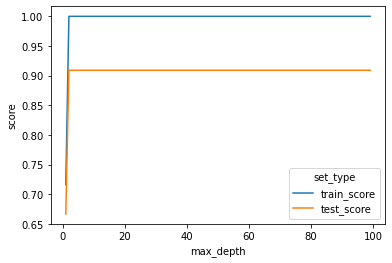

In [33]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [35]:
cats_data = pd.read_csv("dogs_n_cats.csv")

In [36]:
cats_data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [37]:
X = iris_data.drop(['Вид'], axis=1)
y = iris_data.Вид

In [38]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [39]:
#from sklearn.model_selection import train_test_split

In [40]:
#X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
clf.fit(X, y)

1.0

In [62]:
X_test = pd.read_json("dataset_209691_15.txt")

In [63]:
X_test

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,23,27.6,1,1,0
2,33,39.6,1,1,0
3,33,39.6,1,1,0
4,20,24.0,1,1,0
...,...,...,...,...,...
95,11,4.4,1,0,1
96,9,3.6,1,0,1
97,12,4.8,1,0,1
98,11,4.4,1,0,1


In [64]:
y_pred = list(clf.predict(X_test))

In [65]:
y_pred.count('собачка')

45